## Exploratory Data Analysis

Скачиваем датасет

In [140]:
import pandas as pd
#!curl -L -o mobile-price-classification.zip https://www.kaggle.com/api/v1/datasets/download/iabhishekofficial/mobile-price-classification
#!unzip mobile-price-classification.zip

data = pd.read_csv('train.csv') 
data = pd.DataFrame(data)

Устанавливаем библиотеки

In [141]:

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn import datasets
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
warnings.filterwarnings('ignore')

In [142]:

data.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [143]:
data['price_range'].unique()

array([1, 2, 3, 0])

<Axes: xlabel='price_range', ylabel='count'>

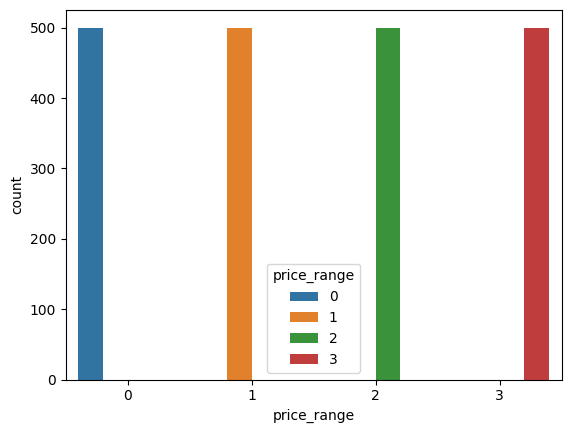

In [144]:
temp_df = data.copy()

temp_df['price_range'] = temp_df['price_range']
sns.countplot(x='price_range', hue='price_range', data=temp_df)

4 вида классов равномерно распределены, как можно увидеть на графике 

In [145]:
#Ищем корреляции признаков
correlation_matrix = data.corr()
correlation_matrix


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


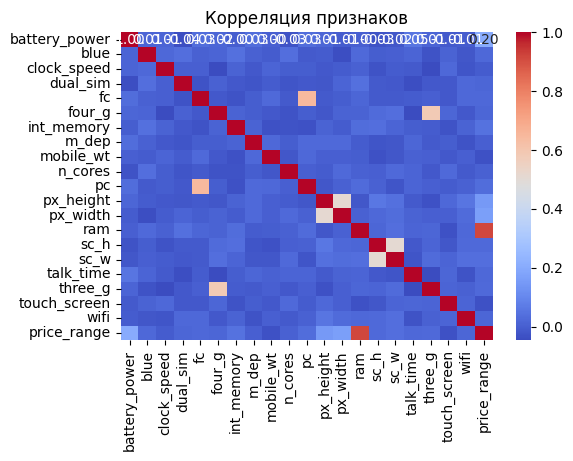

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()


In [147]:
#По графику видно, что корреляция присутствует у признаков:
#pc и fc
#three_g и four_g
#px_width и px_height
#sc_w и sc_h

In [148]:
X = data.drop(['sc_h', 'px_height', 'four_g'], axis=1)

Распределение классов по признакам int_memory и ram

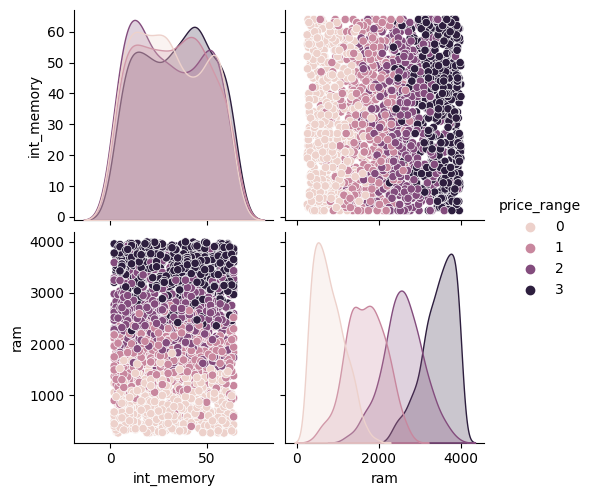

In [149]:
sns.pairplot(data, vars=['int_memory', 'ram'], hue='price_range')


## KNN классификатор

In [150]:
#Модель со всеми параметрами, по умолчанию
from sklearn.preprocessing import MinMaxScaler

x = data.drop(['price_range'], axis=1)
y = data[['price_range']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(x)
x = pd.DataFrame(data_scaled, columns=x.columns)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    x, y, test_size=0.25, random_state=1
    )
labels = data['price_range'].unique()
model_1 = KNeighborsClassifier()
model_1.fit(X1_train, y1_train)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


              precision    recall  f1-score   support

           0       0.59      0.47      0.52       145
           1       0.29      0.25      0.27       144
           2       0.33      0.33      0.33       134
           3       0.33      0.53      0.41        77

    accuracy                           0.38       500
   macro avg       0.38      0.39      0.38       500
weighted avg       0.39      0.38      0.38       500



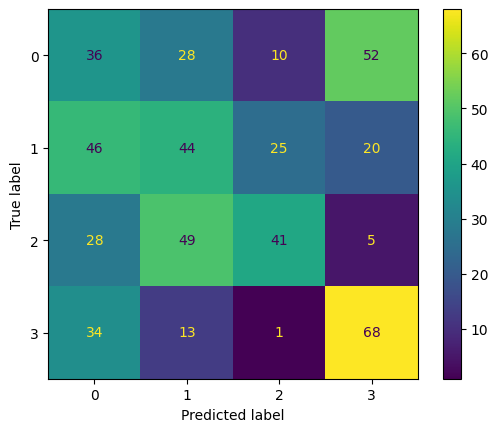

In [151]:
# оцениваем модель 

y_hat = model_1.predict(X1_test)

matrix = confusion_matrix(y1_test, y_hat, labels=labels, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();
print(classification_report(y_hat, y1_test))

Подбираем количество соседей через grid search:

In [159]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
param_grid = {
    'n_neighbors': k_range,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }
grid = GridSearchCV(model_1, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X1_train, y1_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 4752 candidates, totalling 47520 fits
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 98, 'p': 1, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.87      0.75      0.80       135
           1       0.52      0.56      0.54       117
           2       0.56      0.58      0.57       130
           3       0.78      0.81      0.80       118

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.69      0.68      0.68       500



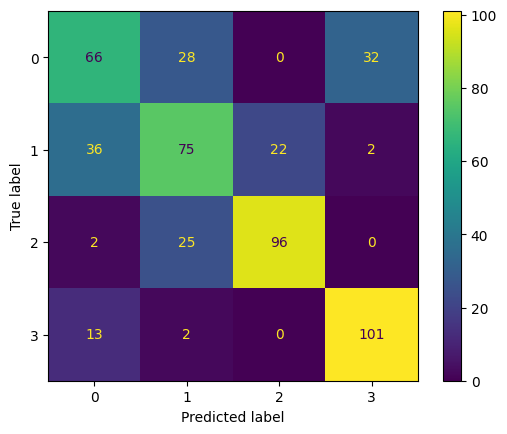

In [160]:
#Оцениваем качество:
best_params = grid_search.best_params_
knn = KNeighborsClassifier(**best_params)
knn.fit(X1_train, y1_train)
preds = knn.predict(X1_test)
print(classification_report(preds, y1_test))
matrix = confusion_matrix(y1_test, preds, labels=labels, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();


### Выводы о моделях KNN

С дефолтными параметрами accuracy было 0,38; с параметрами, подобранными через gridsearch, точность достигла 0,68. Судя по матрице для дефолтных параметров модель плохо определяет 0-2 классы, но более хорошо модель определяет 3 класс, однако он путается с 0, что довольно плохо, ведь 0 класс обозначает диапазон низких цен, а 3 -- высоких.

С подобранными параметрами количество ошибок уменьшилось, однако 0 класс всё ещё определяется хуже всего. 

## Логистическая регрессия

In [154]:
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
warnings.filterwarnings('ignore')

In [155]:

x2_train, x2_test, y2_train, y2_test = train_test_split(
    x, y, test_size=0.30, random_state=1, stratify=y  # stratify отвечает за пропорции классов
    )
model_2 = LogisticRegression(solver='liblinear')
model_2.fit(x2_train, y2_train)
pred = model_2.predict(x2_test)

print(classification_report(pred, y2_test))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       186
           1       0.57      0.72      0.64       119
           2       0.52      0.74      0.61       105
           3       0.99      0.78      0.88       190

    accuracy                           0.77       600
   macro avg       0.77      0.76      0.75       600
weighted avg       0.83      0.77      0.78       600



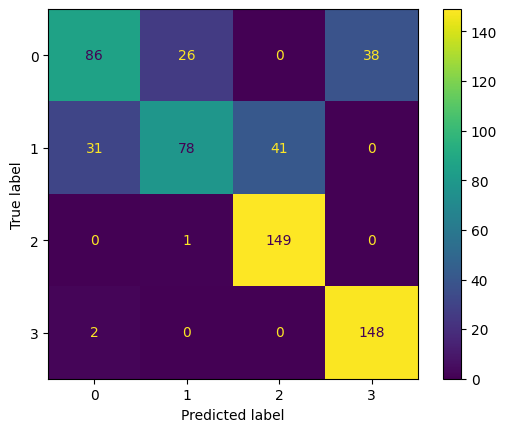

In [156]:
matrix = confusion_matrix(y2_test, pred, labels=labels, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();

In [157]:
#gridsearch
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(model_2, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x2_train, y2_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
{'C': 1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       156
           1       0.95      0.98      0.96       145
           2       0.96      0.98      0.97       147
           3       0.99      0.98      0.99       152

    accuracy                           0.97       600
   macro avg       0.97      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



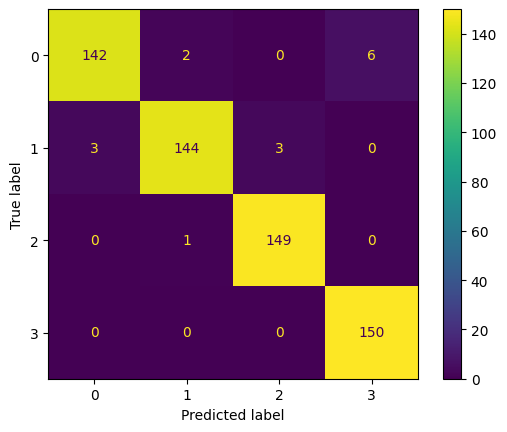

In [158]:

logreg = grid.best_estimator_
pred = logreg.predict(x2_test)
print(classification_report(pred, y2_test))
matrix = confusion_matrix(y2_test, pred, labels=labels, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();

### Выводы о моделях логистической регрессии

При дефолтных параметрах часто путаются 0 и 1 классы. Интересно, что 0 класс путается с 3, а 1 нет. При подобраных параметрах модель даёт практически максимальное качество -- 0,97